Description:<br>
**Please design and implement a proper recurrent neural network based on LSTM or/and GRU for Sentiment Analysis. Data is available at http://deeplearning.net/tutorial/lstm.html**<br>

Preparing data

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

C:\Users\28347\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Use **LSTM**

In [3]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.4957 - acc: 0.7697 - val_loss: 0.3372 - val_acc: 0.8676
Epoch 2/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.2991 - acc: 0.8823 - val_loss: 0.3038 - val_acc: 0.8696
Epoch 3/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.2379 - acc: 0.9102 - val_loss: 0.3163 - val_acc: 0.8782
Epoch 4/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.2015 - acc: 0.9244 - val_loss: 0.3110 - val_acc: 0.8668
Epoch 5/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1777 - acc: 0.9350 - val_loss: 0.2916 - val_acc: 0.8846
Epoch 6/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1602 - acc: 0.9425 - val_loss: 0.3014 - val_acc: 0.8804
Epoch 7/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1424 - acc: 0.9492 - val_loss: 0.4541 - val_acc:

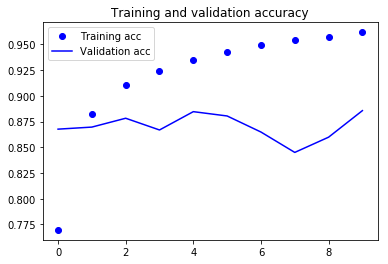

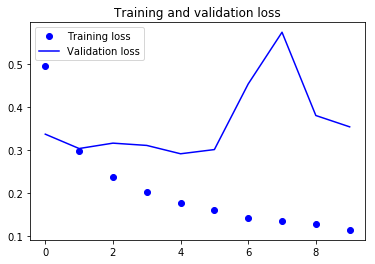

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

Use **GRU**

In [8]:
from keras.layers import GRU

model2 = Sequential()
model2.add(Embedding(max_features, 32))
model2.add(GRU(32))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])
history2 = model2.fit(input_train, y_train,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 58s 3ms/step - loss: 0.5189 - acc: 0.7258 - val_loss: 0.3475 - val_acc: 0.8512
Epoch 2/10
20000/20000 [==============================] - 58s 3ms/step - loss: 0.2977 - acc: 0.8762 - val_loss: 0.3228 - val_acc: 0.8714
Epoch 3/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.2434 - acc: 0.9039 - val_loss: 0.3103 - val_acc: 0.8756
Epoch 4/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.2100 - acc: 0.9201 - val_loss: 0.3735 - val_acc: 0.8458
Epoch 5/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1866 - acc: 0.9302 - val_loss: 0.3355 - val_acc: 0.8582
Epoch 6/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.1690 - acc: 0.9375 - val_loss: 0.3389 - val_acc: 0.8578
Epoch 7/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.1528 - acc: 0.9451 - val_loss: 0.3230 - val_acc:

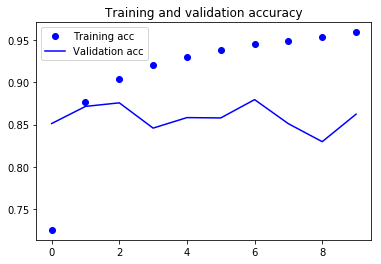

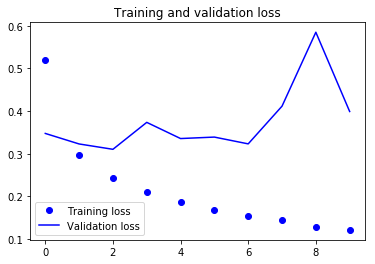

In [9]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();